In [14]:
from pomegranate import BayesianNetwork
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [15]:
Data = pd.read_csv('Fibro_base.csv')

In [16]:
Data.columns

Index(['Unnamed: 0', 'age', 'sex', 'Fibromyalgia', 'pressure',
       'temperature_max', 'humidity', 'precip_intensity', 'temperature_min',
       'icon', 'Anxiety', 'Depression', 'Fatigue', 'Headache', 'Migraine',
       'Nausea', 'Brain fog', 'tired', 'Neck pain', 'Joint pain', 'Back pain',
       'Diarrhea', 'Dizziness', 'Insomnia'],
      dtype='object')

In [17]:
Data.drop(["Unnamed: 0",'age','icon',"pressure","temperature_max","humidity","precip_intensity","temperature_min"], axis=1, inplace =True)

In [18]:
Data.head()

,sex,Fibromyalgia,Anxiety,Depression,Fatigue,Headache,Migraine,Nausea,Brain fog,tired,Neck pain,Joint pain,Back pain,Diarrhea,Dizziness,Insomnia
0,female,2,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,1,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned
1,female,1,Not Mentioned,Not Mentioned,4,1,0,Not Mentioned,Not Mentioned,-,Not Mentioned,Not Mentioned,2,Not Mentioned,Not Mentioned,2
2,female,1,Not Mentioned,Not Mentioned,2,1,0,Not Mentioned,Not Mentioned,-,Not Mentioned,Not Mentioned,2,Not Mentioned,Not Mentioned,1
3,male,2,Not Mentioned,Not Mentioned,Not Mentioned,2,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned
4,male,2,Not Mentioned,Not Mentioned,Not Mentioned,2,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned


In [19]:
def sex_code(x):
    if x == "female":
        return 1
    elif x == "male":
        return 2
    elif x == 'other':
        return 3
    else:
        return 0
def Ment(x):
    if x == "Not Mentioned":
        return -1
    elif x == '-':
        return -1
    else:
        return int(x)
    
Data['sex'] = Data['sex'].apply(sex_code)
for i in Data.columns[2:]:
    Data[i]=Data[i].apply(Ment)

In [21]:
Data.to_csv('Fibro_discr')

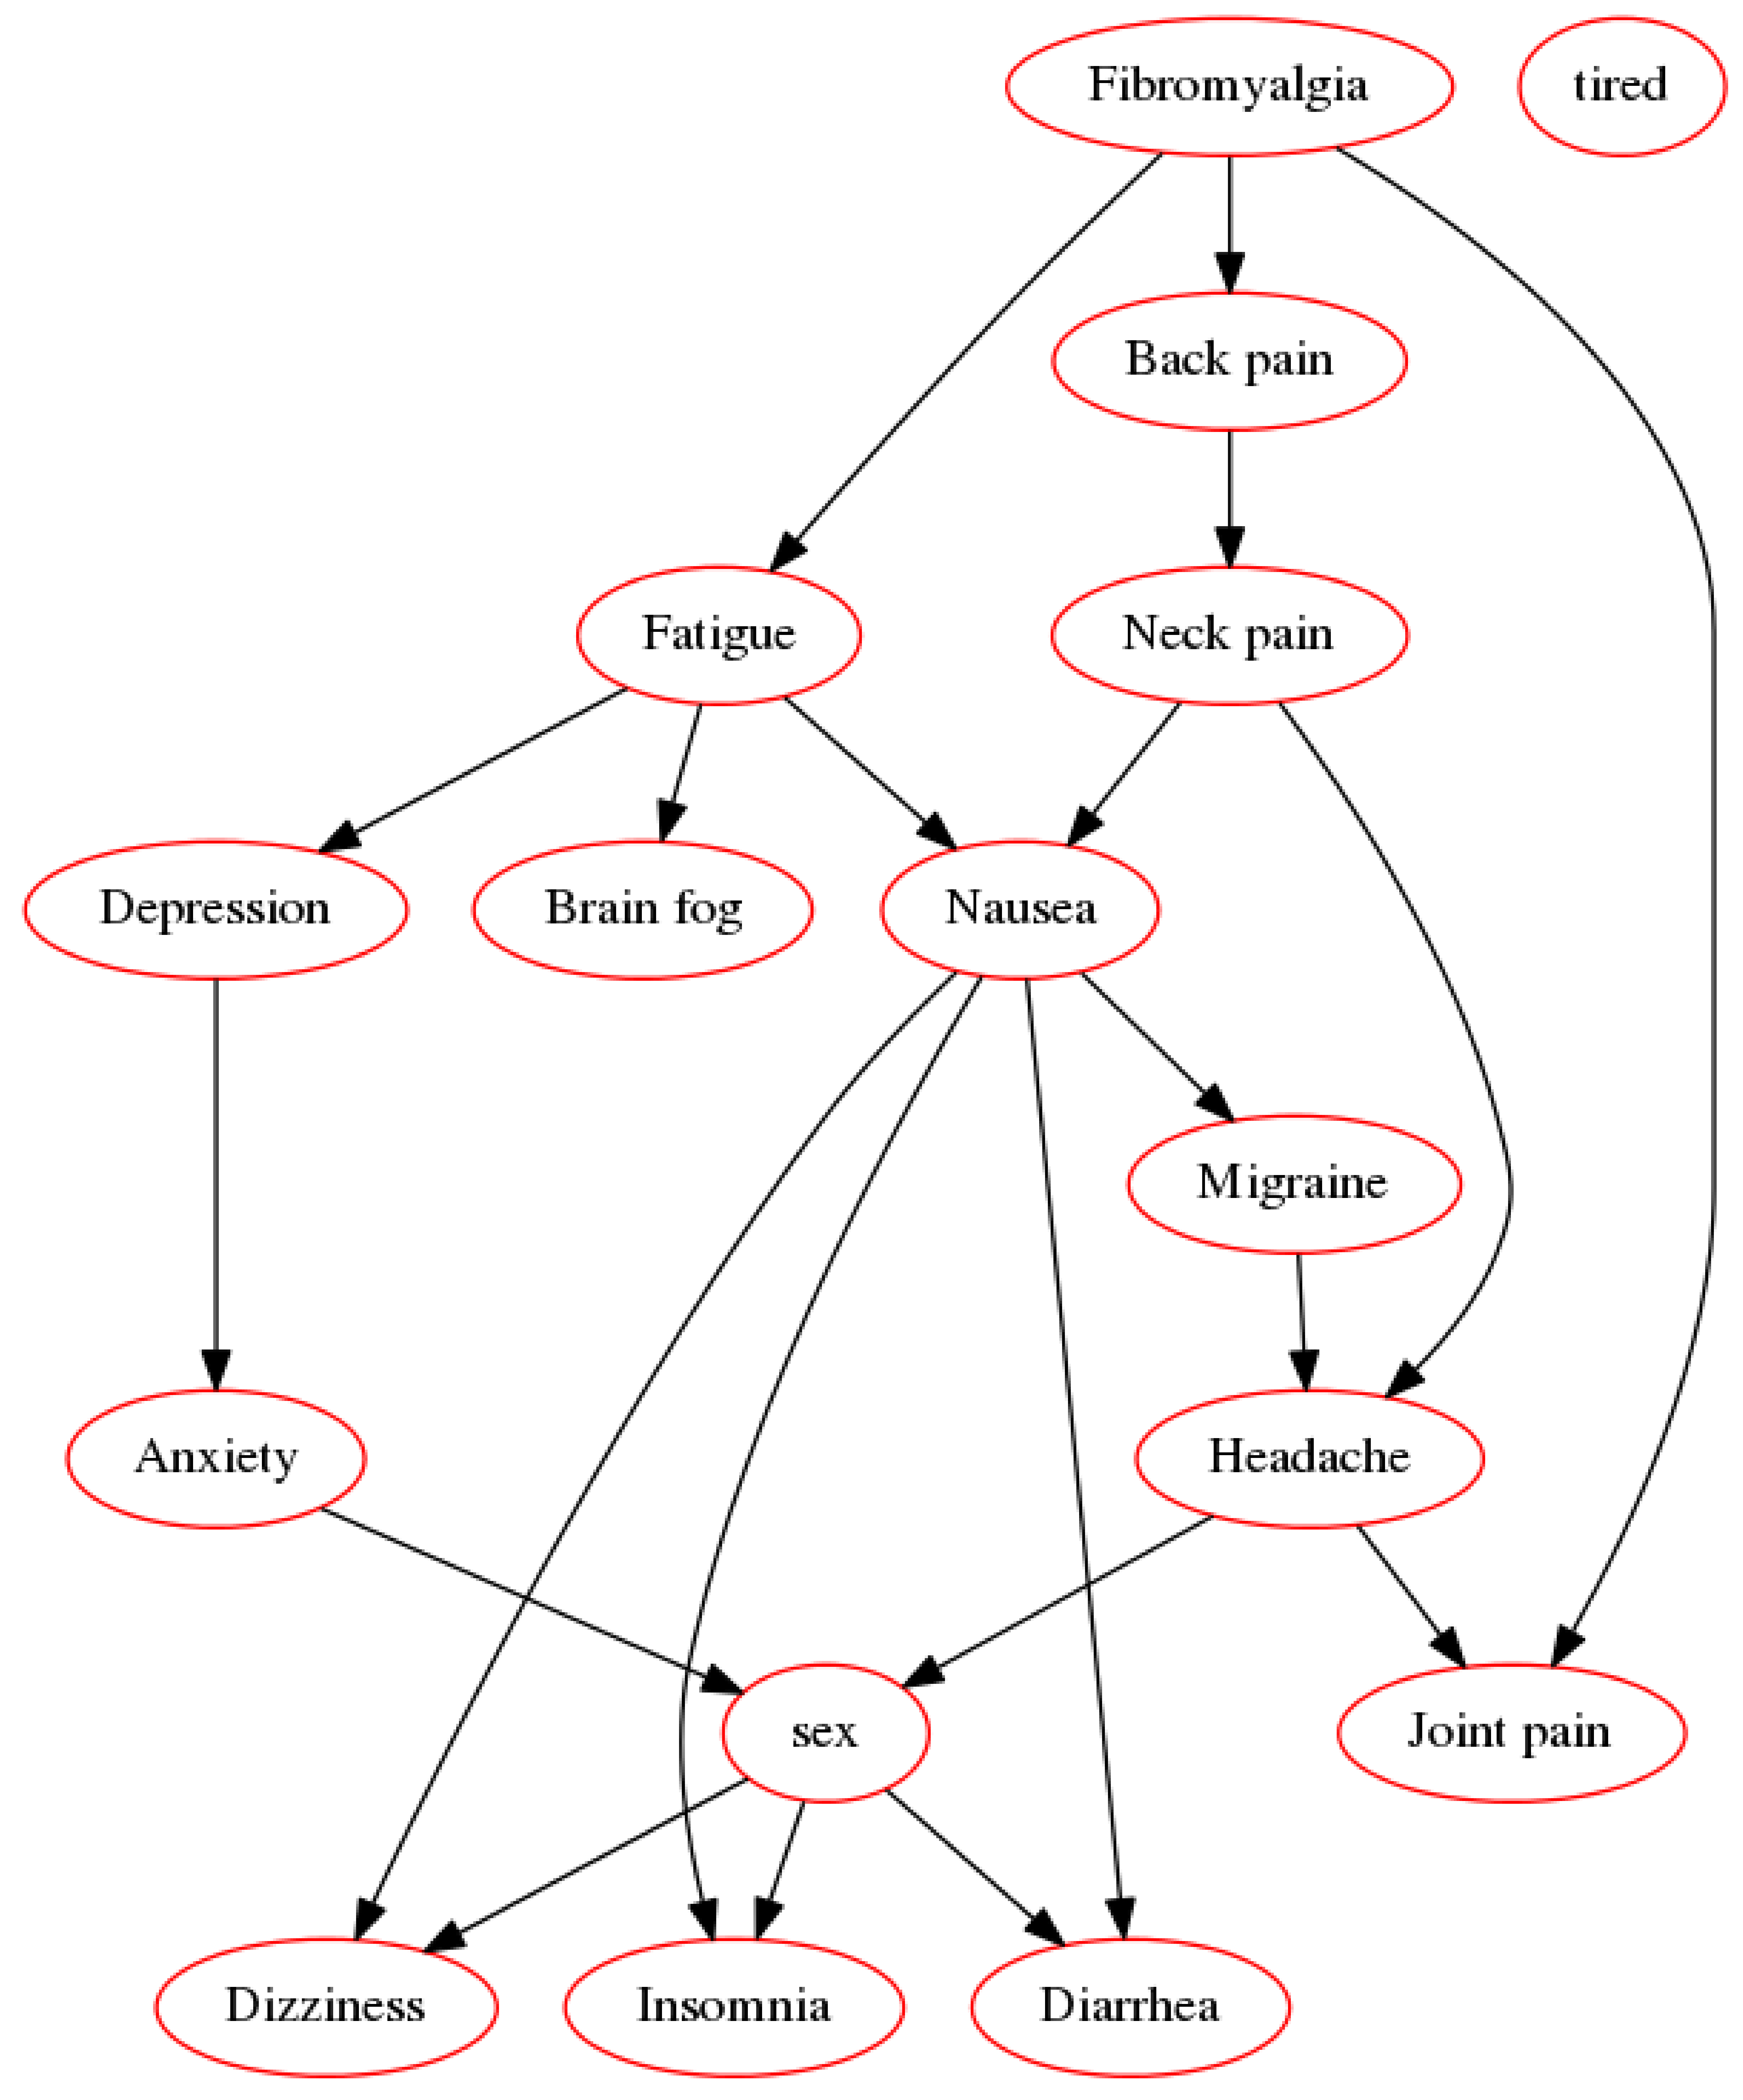

In [22]:
labels = Data.columns
model = BayesianNetwork.from_samples(Data.values, algorithm='exact-dp', state_names = labels)
figsize(100,200)
model.plot()